## Importing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Reading Data

In [2]:
train_data = pd.read_csv("/home/sysadm/F1nalyze/train.csv")
validation_data = pd.read_csv("/home/sysadm/F1nalyze/validation.csv")
test_data = pd.read_csv("/home/sysadm/F1nalyze/test.csv")

/tmp/ipykernel_11155/1946800243.py:1: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/home/sysadm/F1nalyze/train.csv")
/tmp/ipykernel_11155/1946800243.py:2: DtypeWarning: Columns (13,16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_data = pd.read_csv("/home/sysadm/F1nalyze/validation.csv")
/tmp/ipykernel_11155/1946800243.py:3: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("/home/sysadm/F1nalyze/test.csv")


## Fixing Train Data

In [3]:
train_data

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,...,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830096,22109,899,17,9,2,4,2,2,2,18.0,...,61.50,4,4,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,401167805
2830097,22109,899,17,9,2,4,2,2,2,18.0,...,69.50,4,4,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,660484266
2830098,22109,899,17,9,2,4,2,2,2,18.0,...,4.00,8,8,0,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1409316096
2830099,22109,899,17,9,2,4,2,2,2,18.0,...,6.00,10,10,0,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1409846712


In [4]:
train_data.replace('\\N', np.nan, inplace=True)

na_counts = train_data.isna().sum()

print(na_counts)


resultId                        0
racerId                         0
driverId                        0
constructorId                   0
number                        160
grid                            0
position_x                1125357
positionText_x                  0
positionOrder                   0
points                          0
laps                            0
time_x                    1871686
timetaken_in_millisec     1871741
fastestLap                2112010
rank                      2105375
fastestLapTime            2112010
max_speed                 2112010
statusId                        0
year                            0
round                           0
circuitId                       0
grand_prix                      0
date                            0
time_y                    2150026
url_x                           0
fp1_date                  2830101
fp1_time                  2830101
fp2_date                  2830101
fp2_time                  2830101
fp3_date      

In [5]:
train_data.drop(columns = ["resultId","position_x","time_x","timetaken_in_millisec","date","time_y","url_x","fp1_date",
                           "fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date","quali_time","sprint_date","sprint_time","driver_num","driver_code","forename",
                           "surname","dob","url_y","driverStandingsId","raceId_y","positionText_y","constructorRef","url"], inplace=True)

In [6]:
train_data.dropna(inplace= True)

In [7]:
train_data

,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,fastestLap,...,grand_prix,driverRef,nationality,points_y,position,wins,company,nationality_y,status,result_driver_standing
2082849,90,30,6,1,1,1,1,10.0,58,29,...,Australian Grand Prix,michael_schumacher,German,8.0,2,0,Ferrari,Italian,Finished,19404120
2082850,90,30,6,1,1,1,1,10.0,58,29,...,Australian Grand Prix,michael_schumacher,German,11.0,2,0,Ferrari,Italian,Finished,19431390
2082851,90,30,6,1,1,1,1,10.0,58,29,...,Australian Grand Prix,michael_schumacher,German,11.0,4,0,Ferrari,Italian,Finished,19463205
2082852,90,30,6,1,1,1,1,10.0,58,29,...,Australian Grand Prix,michael_schumacher,German,21.0,2,1,Ferrari,Italian,Finished,19496535
2082853,90,30,6,1,1,1,1,10.0,58,29,...,Australian Grand Prix,michael_schumacher,German,31.0,2,2,Ferrari,Italian,Finished,19529865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830096,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,61.5,4,2,Red Bull,Austrian,Finished,401167805
2830097,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,69.5,4,2,Red Bull,Austrian,Finished,660484266
2830098,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,4.0,8,0,Red Bull,Austrian,Finished,1409316096
2830099,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,6.0,10,0,Red Bull,Austrian,Finished,1409846712


In [8]:
def time_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    total_seconds = int(minutes) * 60 + float(seconds)
    return total_seconds

train_data["fastestLapTime"] = train_data["fastestLapTime"].apply(time_to_seconds)

In [9]:
train_data["number"] = train_data["number"].astype(int)
train_data["fastestLap"] = train_data["fastestLap"].astype(int)
train_data["rank"] = train_data["rank"].astype(int)
train_data["max_speed"] = train_data["max_speed"].astype(float)

In [10]:
encoder = LabelEncoder()
train_data["positionText_x"] = encoder.fit_transform(train_data["positionText_x"])
train_data["grand_prix"] = encoder.fit_transform(train_data["grand_prix"])
train_data["driverRef"] = encoder.fit_transform(train_data["driverRef"])
train_data["nationality"] = encoder.fit_transform(train_data["nationality"])
train_data["company"] = encoder.fit_transform(train_data["company"])
train_data["nationality_y"] = encoder.fit_transform(train_data["nationality_y"])
train_data["status"] = encoder.fit_transform(train_data["status"])

In [11]:
train_data.dtypes

racerId                     int64
driverId                    int64
constructorId               int64
number                      int64
grid                        int64
positionText_x              int64
positionOrder               int64
points                    float64
laps                        int64
fastestLap                  int64
rank                        int64
fastestLapTime            float64
max_speed                 float64
statusId                    int64
year                        int64
round                       int64
circuitId                   int64
grand_prix                  int64
driverRef                   int64
nationality                 int64
points_y                  float64
position                    int64
wins                        int64
company                     int64
nationality_y               int64
status                      int64
result_driver_standing      int64
dtype: object

In [12]:
train_data

,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,fastestLap,...,grand_prix,driverRef,nationality,points_y,position,wins,company,nationality_y,status,result_driver_standing
2082849,90,30,6,1,1,0,1,10.0,58,29,...,1,40,11,8.0,2,0,4,7,33,19404120
2082850,90,30,6,1,1,0,1,10.0,58,29,...,1,40,11,11.0,2,0,4,7,33,19431390
2082851,90,30,6,1,1,0,1,10.0,58,29,...,1,40,11,11.0,4,0,4,7,33,19463205
2082852,90,30,6,1,1,0,1,10.0,58,29,...,1,40,11,21.0,2,1,4,7,33,19496535
2082853,90,30,6,1,1,0,1,10.0,58,29,...,1,40,11,31.0,2,2,4,7,33,19529865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830096,899,17,9,2,4,11,2,18.0,71,51,...,4,65,1,61.5,4,2,17,0,33,401167805
2830097,899,17,9,2,4,11,2,18.0,71,51,...,4,65,1,69.5,4,2,17,0,33,660484266
2830098,899,17,9,2,4,11,2,18.0,71,51,...,4,65,1,4.0,8,0,17,0,33,1409316096
2830099,899,17,9,2,4,11,2,18.0,71,51,...,4,65,1,6.0,10,0,17,0,33,1409846712


## Fixing Validation Data

In [13]:
validation_data.replace('\\N', np.nan, inplace=True)
na_counts = validation_data.isna().sum()
print(na_counts)


resultId                       0
racerId                        0
driverId                       0
constructorId                  0
number                         0
grid                           0
position_x                 62123
positionText_x                 0
positionOrder                  0
points                         0
laps                           0
time_x                    155366
timetaken_in_millisec     155366
fastestLap                 16390
rank                           0
fastestLapTime             16390
max_speed                  16390
statusId                       0
year                           0
round                          0
circuitId                      0
grand_prix                     0
date                           0
time_y                         0
url_x                          0
fp1_date                  353762
fp1_time                  353762
fp2_date                  353762
fp2_time                  353762
fp3_date                  353762
fp3_time  

In [14]:
validation_data.drop(columns = ["resultId","position_x","time_x","timetaken_in_millisec","date","time_y","url_x","fp1_date",
                           "fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date","quali_time","sprint_date","sprint_time","driver_num","driver_code","forename",
                           "surname","dob","url_y","driverStandingsId","raceId_y","positionText_y","constructorRef","url"], inplace=True)

In [15]:
validation_data.dropna(inplace= True)

In [16]:
validation_data

,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,fastestLap,...,grand_prix,driverRef,nationality,points_y,position,wins,company,nationality_y,status,result_driver_standing
0,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,28.0,8,0,Red Bull,Austrian,Finished,1410907944
1,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,53.0,4,1,Red Bull,Austrian,Finished,1411438560
2,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,78.0,1,2,Red Bull,Austrian,Finished,1412499792
3,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,93.0,1,2,Red Bull,Austrian,Finished,1413030408
4,899,17,9,2,4,2,2,18.0,71,51,...,Brazilian Grand Prix,webber,Australian,103.0,3,2,Red Bull,Austrian,Finished,1413561024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353757,997,4,1,14,13,8,8,4.0,70,69,...,Austrian Grand Prix,alonso,Spanish,123.0,1,6,McLaren,British,+1 Lap,1705168800
353758,997,4,1,14,13,8,8,4.0,70,69,...,Austrian Grand Prix,alonso,Spanish,133.0,1,7,McLaren,British,+1 Lap,1705815423
353759,997,4,1,14,13,8,8,4.0,70,69,...,Austrian Grand Prix,alonso,Spanish,6.0,3,0,McLaren,British,+1 Lap,297542376
353760,997,4,1,14,13,8,8,4.0,70,69,...,Austrian Grand Prix,alonso,Spanish,8.0,5,0,McLaren,British,+1 Lap,297877662


In [17]:
validation_data["fastestLapTime"] = validation_data["fastestLapTime"].apply(time_to_seconds)

In [18]:
validation_data["number"] = validation_data["number"].astype(int)
validation_data["fastestLap"] = validation_data["fastestLap"].astype(int)
validation_data["rank"] = validation_data["rank"].astype(int)
validation_data["max_speed"] = validation_data["max_speed"].astype(float)

In [19]:
encoder = LabelEncoder()
validation_data["positionText_x"] = encoder.fit_transform(validation_data["positionText_x"])
validation_data["grand_prix"] = encoder.fit_transform(validation_data["grand_prix"])
validation_data["driverRef"] = encoder.fit_transform(validation_data["driverRef"])
validation_data["nationality"] = encoder.fit_transform(validation_data["nationality"])
validation_data["company"] = encoder.fit_transform(validation_data["company"])
validation_data["nationality_y"] = encoder.fit_transform(validation_data["nationality_y"])
validation_data["status"] = encoder.fit_transform(validation_data["status"])

In [20]:
validation_data.dtypes

racerId                     int64
driverId                    int64
constructorId               int64
number                      int64
grid                        int64
positionText_x              int64
positionOrder               int64
points                    float64
laps                        int64
fastestLap                  int64
rank                        int64
fastestLapTime            float64
max_speed                 float64
statusId                    int64
year                        int64
round                       int64
circuitId                   int64
grand_prix                  int64
driverRef                   int64
nationality                 int64
points_y                  float64
position                    int64
wins                        int64
company                     int64
nationality_y               int64
status                      int64
result_driver_standing      int64
dtype: object

In [21]:
validation_data

,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,fastestLap,...,grand_prix,driverRef,nationality,points_y,position,wins,company,nationality_y,status,result_driver_standing
0,899,17,9,2,4,11,2,18.0,71,51,...,6,42,1,28.0,8,0,9,1,20,1410907944
1,899,17,9,2,4,11,2,18.0,71,51,...,6,42,1,53.0,4,1,9,1,20,1411438560
2,899,17,9,2,4,11,2,18.0,71,51,...,6,42,1,78.0,1,2,9,1,20,1412499792
3,899,17,9,2,4,11,2,18.0,71,51,...,6,42,1,93.0,1,2,9,1,20,1413030408
4,899,17,9,2,4,11,2,18.0,71,51,...,6,42,1,103.0,3,2,9,1,20,1413561024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353757,997,4,1,14,13,20,8,4.0,70,69,...,2,0,18,123.0,1,6,7,2,0,1705168800
353758,997,4,1,14,13,20,8,4.0,70,69,...,2,0,18,133.0,1,7,7,2,0,1705815423
353759,997,4,1,14,13,20,8,4.0,70,69,...,2,0,18,6.0,3,0,7,2,0,297542376
353760,997,4,1,14,13,20,8,4.0,70,69,...,2,0,18,8.0,5,0,7,2,0,297877662


## Fixing Test Data

In [22]:
test_data.replace('\\N', np.nan, inplace=True)
na_counts = test_data.isna().sum()

print(na_counts)


resultId                       0
racerId                        0
driverId                       0
constructorId                  0
number                         0
grid                           0
position_x                 45237
positionText_x                 0
positionOrder                  0
points                         0
laps                           0
time_x                    145425
timetaken_in_millisec     145425
fastestLap                 12225
rank                           0
fastestLapTime             12225
max_speed                  12225
statusId                       0
year                           0
round                          0
circuitId                      0
grand_prix                     0
date                           0
time_y                         0
url_x                          0
fp1_date                  177237
fp1_time                  249976
fp2_date                  177237
fp2_time                  249976
fp3_date                  204987
fp3_time  

In [23]:
test_data.drop(columns = ["resultId","position_x","time_x","timetaken_in_millisec","date","time_y","url_x","fp1_date",
                           "fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date","quali_time","sprint_date","sprint_time","driver_num","driver_code","forename",
                           "surname","dob","url_y","driverStandingsId","raceId_y","constructorRef","url"], inplace=True)

In [24]:
test_data['fastestLapTime'] = test_data['fastestLapTime'].apply(lambda x: time_to_seconds(x) if pd.notna(x) else x)

In [25]:
test_data["number"] = test_data["number"].astype(int)
test_data['fastestLap'] = test_data['fastestLap'].apply(lambda x: int(x) if pd.notna(x) else x)
test_data["rank"] = test_data["rank"].astype(int)
test_data["max_speed"] = test_data["max_speed"].apply(lambda x: float(x) if pd.notna(x) else x)

In [26]:
encoder = LabelEncoder()
test_data["positionText_x"] = encoder.fit_transform(test_data["positionText_x"])
test_data["grand_prix"] = encoder.fit_transform(test_data["grand_prix"])
test_data["driverRef"] = encoder.fit_transform(test_data["driverRef"])
test_data["nationality"] = encoder.fit_transform(test_data["nationality"])
test_data["company"] = encoder.fit_transform(test_data["company"])
test_data["nationality_y"] = encoder.fit_transform(test_data["nationality_y"])
test_data["status"] = encoder.fit_transform(test_data["status"])

In [27]:
numerical_columns = ["fastestLap","fastestLapTime","max_speed"]
test_data[numerical_columns] = test_data[numerical_columns].apply(lambda col: col.fillna(col.mean()), axis=0)

In [28]:
na_counts = test_data.isna().sum()

print(na_counts)

racerId                   0
driverId                  0
constructorId             0
number                    0
grid                      0
positionText_x            0
positionOrder             0
points                    0
laps                      0
fastestLap                0
rank                      0
fastestLapTime            0
max_speed                 0
statusId                  0
year                      0
round                     0
circuitId                 0
grand_prix                0
driverRef                 0
nationality               0
points_y                  0
wins                      0
company                   0
nationality_y             0
status                    0
result_driver_standing    0
dtype: int64


In [29]:
test_data.dtypes

racerId                     int64
driverId                    int64
constructorId               int64
number                      int64
grid                        int64
positionText_x              int64
positionOrder               int64
points                    float64
laps                        int64
fastestLap                float64
rank                        int64
fastestLapTime            float64
max_speed                 float64
statusId                    int64
year                        int64
round                       int64
circuitId                   int64
grand_prix                  int64
driverRef                   int64
nationality                 int64
points_y                  float64
wins                        int64
company                     int64
nationality_y               int64
status                      int64
result_driver_standing      int64
dtype: object

In [30]:
test_data

,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,fastestLap,...,circuitId,grand_prix,driverRef,nationality,points_y,wins,company,nationality_y,status,result_driver_standing
0,997,4,1,14,13,18,8,4.0,70,69.000000,...,70,3,2,19,16.0,0,7,2,0,298739826
1,997,4,1,14,13,18,8,4.0,70,69.000000,...,70,3,2,19,21.0,0,7,2,0,299218806
2,997,4,1,14,13,18,8,4.0,70,69.000000,...,70,3,2,19,21.0,0,7,2,0,299697786
3,997,4,1,14,13,18,8,4.0,70,69.000000,...,70,3,2,19,25.0,0,7,2,0,300176766
4,997,4,1,14,13,18,8,4.0,70,69.000000,...,70,3,2,19,25.0,0,7,2,0,300655746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352923,1110,857,1,81,5,21,20,0.0,0,46.738294,...,13,6,23,1,5.0,0,7,2,9,1880337225
352924,1110,857,1,81,5,21,20,0.0,0,46.738294,...,13,6,23,1,5.0,0,7,2,9,1881380625
352925,1110,857,1,81,5,21,20,0.0,0,46.738294,...,13,6,23,1,17.0,0,7,2,9,1881902325
352926,1110,857,1,81,5,21,20,0.0,0,46.738294,...,13,6,23,1,27.0,0,7,2,9,1882424025


In [31]:
y_train = train_data.pop("position")

In [32]:
y_val = validation_data.pop("position")

In [33]:
# scaler_standard = StandardScaler()
# x_train = scaler_standard.fit_transform(train_data)
# x_val = scaler_standard.fit_transform(validation_data)

In [34]:
x_train = train_data
x_val = validation_data

In [35]:
# x_train = pd.DataFrame(x_train, columns=['number', 'grid', 'positionText_x','positionOrder','points','laps','fastestLap','rank','fastestLapTime','max_speed','statusId','year','round','circuitId','grand_prix','driverRef','nationality','points_y','wins','company','nationality_y','status', 'result_driver_standing'])
# x_val = pd.DataFrame(x_val, columns=['number', 'grid', 'positionText_x','positionOrder','points','laps','fastestLap','rank','fastestLapTime','max_speed','statusId','year','round','circuitId','grand_prix','driverRef','nationality','points_y','wins','company','nationality_y','status', 'result_driver_standing'])

In [36]:
x_train

,racerId,driverId,constructorId,number,grid,positionText_x,positionOrder,points,laps,fastestLap,...,circuitId,grand_prix,driverRef,nationality,points_y,wins,company,nationality_y,status,result_driver_standing
2082849,90,30,6,1,1,0,1,10.0,58,29,...,1,1,40,11,8.0,0,4,7,33,19404120
2082850,90,30,6,1,1,0,1,10.0,58,29,...,1,1,40,11,11.0,0,4,7,33,19431390
2082851,90,30,6,1,1,0,1,10.0,58,29,...,1,1,40,11,11.0,0,4,7,33,19463205
2082852,90,30,6,1,1,0,1,10.0,58,29,...,1,1,40,11,21.0,1,4,7,33,19496535
2082853,90,30,6,1,1,0,1,10.0,58,29,...,1,1,40,11,31.0,2,4,7,33,19529865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830096,899,17,9,2,4,11,2,18.0,71,51,...,18,4,65,1,61.5,2,17,0,33,401167805
2830097,899,17,9,2,4,11,2,18.0,71,51,...,18,4,65,1,69.5,2,17,0,33,660484266
2830098,899,17,9,2,4,11,2,18.0,71,51,...,18,4,65,1,4.0,0,17,0,33,1409316096
2830099,899,17,9,2,4,11,2,18.0,71,51,...,18,4,65,1,6.0,0,17,0,33,1409846712


In [37]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=100)
# rf.fit(x_train,y_train)
# y_train_pred = rf.predict(x_train)
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=5)
tree_regressor.fit(x_train,y_train)
y_train_pred = tree_regressor.predict(x_train)
y_val_pred = tree_regressor.predict(x_val)

In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")

Mean Squared Error (MSE) on training data: 8.565202507790636
Mean Squared Error (MSE) on training data: 8.467656630428241


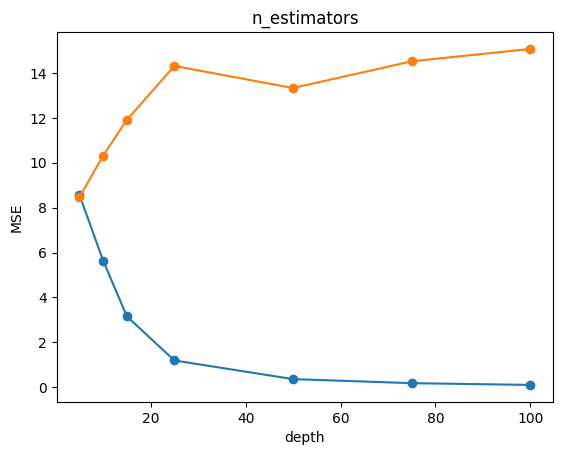

In [39]:
max_depth1 = [5,10,15,25,50,75,100]
train_result=[]
val_result=[]
for i in max_depth1:
    tree_c= DecisionTreeRegressor(max_depth = i)
    tree_c.fit(x_train,y_train)
    y_train_pred = tree_c.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = tree_c.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))

    
import matplotlib.pyplot as plt



plt.plot(max_depth1,train_result, marker='o', linestyle='-')
plt.plot(max_depth1,val_result, marker='o', linestyle='-')
plt.xlabel("depth")
plt.ylabel('MSE')
plt.title('n_estimators')
plt.show()


In [ ]:
val_result

[14.21995654671602,
 22.920112052190575,
 22.361776130745305,
 25.49158100259187,
 25.61272391874598,
 23.63010003366536,
 23.94269660776414]

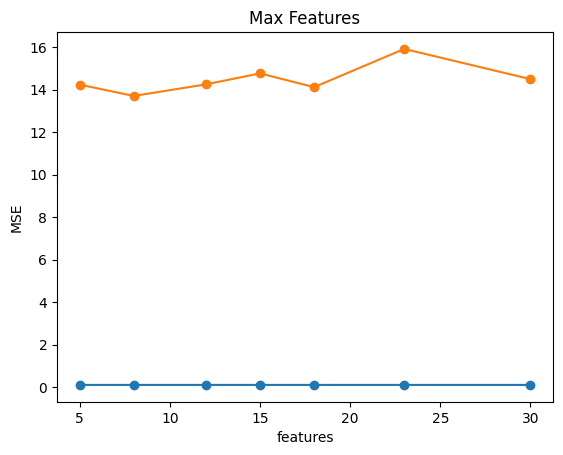

In [40]:
max_fe1 = [5,8,12,15,18,23,30]
train_result=[]
val_result=[]
for i in max_fe1:
    tree_= DecisionTreeRegressor(max_features = i)
    tree_c.fit(x_train,y_train)
    y_train_pred = tree_c.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = tree_c.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))





plt.plot(max_fe1,train_result, marker='o', linestyle='-')
plt.plot(max_fe1,val_result, marker='o', linestyle='-')
plt.xlabel("features")
plt.ylabel('MSE')
plt.title('Max Features')
plt.show()


In [46]:
list1=[]
depth = [5,10]
features= [None]
min_samples_s = [None,1.0,12,14]
for j in depth:
    for k in features:
        for l in min_samples_s:
            tree_= DecisionTreeRegressor(max_depth = j, max_features = k, min_samples_split = l)
            tree_c.fit(x_train,y_train)
            y_train_pred = tree_c.predict(x_train)
            train_accuracy = mean_squared_error(y_train, y_train_pred)
            y_val_pred = tree_c.predict(x_val)
            val_accuracy = mean_squared_error(y_val, y_val_pred)
            list1.append((j,k,l,train_accuracy,val_accuracy))
            print(f'''For max_depth:{j},max_features:{k},min_samples_split:{l}
            train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')

For max_depth:5,max_features:None,min_samples_split:None
            train accuracy:0.09868907194970461 validation accuracy:14.825452065145962
For max_depth:5,max_features:None,min_samples_split:1.0
            train accuracy:0.09868879617792438 validation accuracy:14.491686762364017
For max_depth:5,max_features:None,min_samples_split:12
            train accuracy:0.09891317203340717 validation accuracy:13.386814272937723
For max_depth:5,max_features:None,min_samples_split:14
            train accuracy:0.09869273775928085 validation accuracy:14.121092760440462


KeyboardInterrupt: 

In [42]:
all_train_acc=[list1[i][3] for i in range(len(list1))]
all_val_acc=[list1[i][4] for i in range(len(list1))]
print(all_train_acc)
print(all_val_acc)

[0.09868559555971745, 0.09868681957981033, 0.0988796417551417, 0.09887252089264603, 0.09889953373253454, 0.09868642243156203, 0.09847377054735078, 0.09868524639452511, 0.09868063919978282, 0.09891010907178086, 0.0988019875120844, 0.09869139003982162, 0.09891371454299211, 0.09869182205377405, 0.09878874559107732, 0.09869334162546521, 0.09868116927446578, 0.09870059624895228, 0.09853571187513281, 0.0987075662446557, 0.09869298770392759, 0.09868712215659257, 0.0989155725395942, 0.09879489326276687, 0.09869901443573567, 0.09854278628590178, 0.09867926265786812, 0.09890764500818931, 0.09891709131958937, 0.09868815014359714, 0.09891558977333241, 0.0989075680452534, 0.09891652051156641, 0.09891347899241097, 0.09890893378704155, 0.09868812724690022, 0.09868652891134162, 0.09869117437595992, 0.09868565736820775, 0.09868359402195656, 0.09869623786666408, 0.09870199017500485]
[14.388527647357881, 13.530729119328415, 14.180291165425988, 13.825499798441436, 14.666253462922176, 14.767411900911402, 1

In [43]:
import heapq
max_5_val_acc = heapq.nsmallest(10, all_val_acc)
max_5_val_acc

[13.105853836617767,
 13.270990198061032,
 13.530729119328415,
 13.589707198389268,
 13.599918565292748,
 13.600165405073474,
 13.692037740993868,
 13.780567982031913,
 13.825499798441436,
 13.932409705275944]

In [44]:
for i in range(len(max_5_val_acc)):
    print(list1[all_val_acc.index(max_5_val_acc[i])])

(5, 30, 1.0, 0.09853571187513281, 13.105853836617767)
(5, 18, 1.0, 0.09891371454299211, 13.270990198061032)
(5, 5, 12, 0.09868681957981033, 13.530729119328415)
(5, 23, 14, 0.09870059624895228, 13.589707198389268)
(10, 5, 14, 0.09879489326276687, 13.599918565292748)
(10, 12, 12, 0.09891709131958937, 13.600165405073474)
(5, 12, 14, 0.09868063919978282, 13.692037740993868)
(10, 30, 14, 0.09870199017500485, 13.780567982031913)
(5, 8, 1.0, 0.09887252089264603, 13.825499798441436)
(10, 12, 1.0, 0.09890764500818931, 13.932409705275944)


In [47]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(x_train,y_train)
y_train_pred = tree_regressor.predict(x_train)
y_val_pred = tree_regressor.predict(x_val)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")

Mean Squared Error (MSE) on training data: 0.0
Mean Squared Error (MSE) on training data: 13.996078512739647


In [49]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
xgb.fit(x_train, y_train)
y_train_pred = xgb.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = xgb.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

Mean Squared Error (MSE) on training data: 7.373552884490313
Mean Squared Error (MSE) on training data: 7.864480551002882


In [50]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
lgbm.fit(x_train, y_train)
y_train_pred = lgbm.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = lgbm.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 718091, number of used features: 26
[LightGBM] [Info] Start training from score 9.241747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [52]:
from catboost import CatBoostRegressor
catboost = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, random_state=0, silent=True)
catboost.fit(x_train, y_train)
y_train_pred = catboost.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = catboost.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

Mean Squared Error (MSE) on training data: 7.858578832098094
Mean Squared Error (MSE) on training data: 7.634794630684779


## Lightgbm Model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 718091, number of used features: 26
[LightGBM] [Info] Start training from score 9.241747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

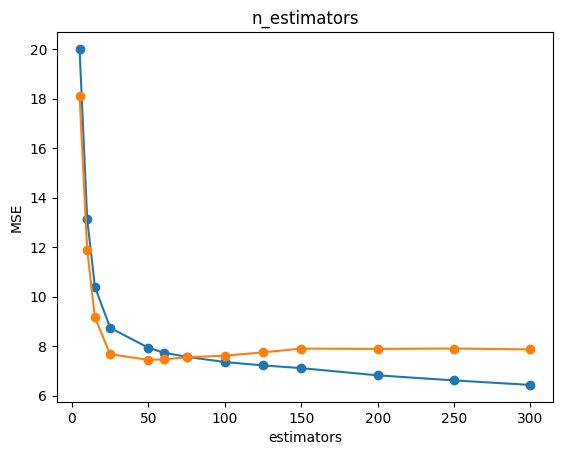

In [56]:
estim = [5,10,15,25,50,60,75,100,125,150,200,250,300]
train_result=[]
val_result=[]
for i in estim:
    lgbm = lgb.LGBMRegressor(n_estimators=i, learning_rate=0.1, max_depth=3, random_state=0)
    lgbm.fit(x_train, y_train)
    y_train_pred = lgbm.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = lgbm.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))

    
import matplotlib.pyplot as plt



plt.plot(estim,train_result, marker='o', linestyle='-')
plt.plot(estim,val_result, marker='o', linestyle='-')
plt.xlabel("estimators")
plt.ylabel('MSE')
plt.title('n_estimators')
plt.show()


In [57]:
val_result

[18.114441095132864,
 11.894981527700898,
 9.163041289854174,
 7.671183541186087,
 7.440341071842932,
 7.460204981769586,
 7.543486108439111,
 7.609841468743703,
 7.743447667843093,
 7.896848089769793,
 7.883395820097669,
 7.898753552249559,
 7.86452427587386]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1967
[LightGBM] [Info] Number of data points in the train set: 718091, number of used features: 26
[LightGBM] [Info] Start training from score 9.241747
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1967
[LightGBM] [Info] Number of data points in the train set: 718091, number of used features: 26
[LightGBM] [Info] Start training from score 9.241747
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

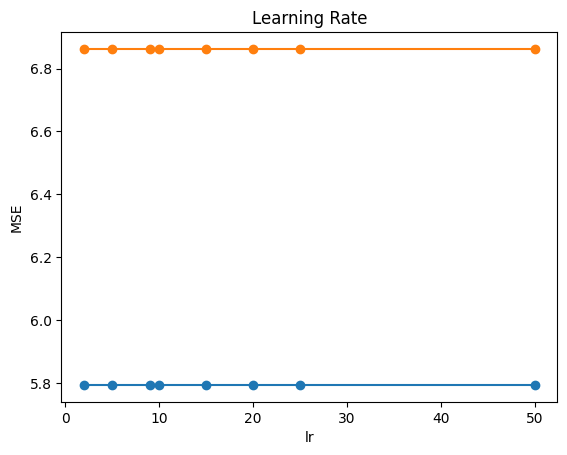

In [67]:
estim = [2,5,9,10,15,20,25,50]
train_result=[]
val_result=[]
for i in estim:
    lgbm = lgb.LGBMRegressor(n_estimators=50, learning_rate= 0.1 , max_depth=9, random_state=32)
    lgbm.fit(x_train, y_train)
    y_train_pred = lgbm.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = lgbm.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))

    
import matplotlib.pyplot as plt



plt.plot(estim,train_result, marker='o', linestyle='-')
plt.plot(estim,val_result, marker='o', linestyle='-')
plt.xlabel("lr")
plt.ylabel('MSE')
plt.title('Learning Rate')
plt.show()


In [69]:
list1=[]
depth = [5,7,9,12,15,25]
features= [5,10,15,25,50,60,75,100,125,150,200,250,300]
min_samples_s = [0.01,0.1,1]
for j in depth:
    for k in features:
        for l in min_samples_s:
            lgbm = lgb.LGBMRegressor(n_estimators=k, learning_rate= l , max_depth=j, random_state=32)
            lgbm.fit(x_train, y_train)
            y_train_pred = lgbm.predict(x_train)
            train_accuracy = mean_squared_error(y_train, y_train_pred)
            y_val_pred = lgbm.predict(x_val)
            val_accuracy = mean_squared_error(y_val, y_val_pred)
            list1.append((j,k,l,train_accuracy,val_accuracy))
            print(f'''For max_depth:{j},n_estimators:{k},learning_rate:{l}
            train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1967
[LightGBM] [Info] Number of data points in the train set: 718091, number of used features: 26
[LightGBM] [Info] Start training from score 9.241747
For max_depth:5,n_estimators:5,learning_rate:0.01
            train accuracy:36.1510298109849 validation accuracy:32.4098536029734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1967
[LightGBM] [Info] Number of data points in the train set: 718091, number of used features: 26
[LightGBM] [Info] Start training from score 9.241747
For max_depth:5,n_estimators:5,learning_rate:0.1
      

In [70]:
all_train_acc=[list1[i][3] for i in range(len(list1))]
all_val_acc=[list1[i][4] for i in range(len(list1))]
print(all_train_acc)
print(all_val_acc)

[36.1510298109849, 19.0792471541391, 6.887312439602985, 33.51188038959396, 11.824411465158777, 6.212862142630698, 31.125080592705153, 9.044898879007789, 5.716901710809538, 27.009906077774325, 7.325159967307473, 5.265310504671655, 19.61166251243849, 6.317523631551223, 4.567967234947485, 17.524165436599368, 6.141711968971616, 4.319195063862755, 15.057922007357382, 5.929390376746009, 4.081689762432775, 12.215511771560614, 5.671810819055032, 3.77600532390352, 10.419588323986646, 5.4443583456575695, 3.5790227780389623, 9.2692290557904, 5.209943257434961, 3.4271424476133223, 8.012694824294373, 4.941176819493239, 3.190165898074657, 7.3825682500551135, 4.714982436490067, 3.0384623148721657, 7.011735205342217, 4.493292450080644, 2.913054120223044, 36.11438369444857, 18.818216854977972, 6.564050220848866, 33.442377547329855, 11.47662540590445, 5.848102461163173, 31.024839180190998, 8.655186553284112, 5.476943647766671, 26.852864522664373, 6.861302449827877, 4.852564554859439, 19.358760912481834,

In [71]:
import heapq
max_5_val_acc = heapq.nsmallest(10, all_val_acc)
max_5_val_acc

[6.862403055174539,
 6.866426822858114,
 6.866426822858114,
 6.883402563784268,
 6.888768302366576,
 6.944909557591066,
 6.97792439927659,
 6.97792439927659,
 6.982576981787806,
 6.985789810082333]

In [72]:
for i in range(len(max_5_val_acc)):
    print(list1[all_val_acc.index(max_5_val_acc[i])])

(9, 50, 0.1, 5.79335459659343, 6.862403055174539)
(15, 300, 0.01, 6.509703252332962, 6.866426822858114)
(15, 300, 0.01, 6.509703252332962, 6.866426822858114)
(12, 300, 0.01, 6.512326026098987, 6.883402563784268)
(9, 300, 0.01, 6.528886136628606, 6.888768302366576)
(9, 60, 0.1, 5.609826744321922, 6.944909557591066)
(15, 250, 0.01, 6.870727126444954, 6.97792439927659)
(15, 250, 0.01, 6.870727126444954, 6.97792439927659)
(7, 300, 0.01, 6.59316561232012, 6.982576981787806)
(9, 75, 0.1, 5.396368263081369, 6.985789810082333)


In [130]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(n_estimators=50, learning_rate=0.1, max_depth=9, random_state=0)
lgbm.fit(x_train, y_train)
y_train_pred = lgbm.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = lgbm.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 718091, number of used features: 26
[LightGBM] [Info] Start training from score 9.241747
Mean Squared Error (MSE) on training data: 5.841260083619429
Mean Squared Error (MSE) on training data: 6.796103193512809


In [131]:
y_test_pred = lgbm.predict(test_data)

In [132]:
result_df = pd.DataFrame({
    'position': y_test_pred,
    'result_driver_standing': test_data["result_driver_standing"]
})
result_df.to_csv('submission_file_lgbm.csv', index=False, header=['position', 'result_driver_standing'])

## Xg Boost

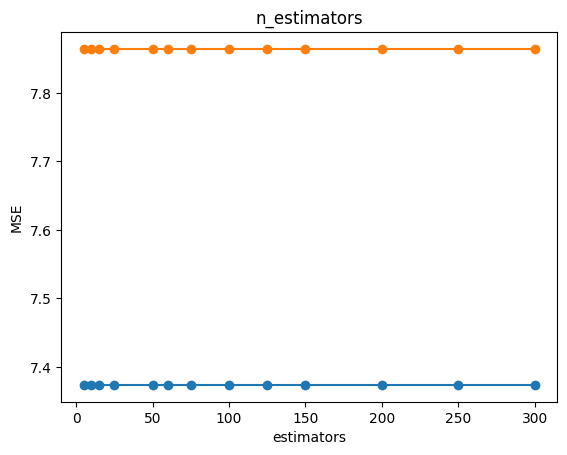

In [77]:
estim = [5,10,15,25,50,60,75,100,125,150,200,250,300]
train_result=[]
val_result=[]
for i in estim:
    lxgb = XGBRegressor(n_estimators=i, learning_rate=0.1, max_depth=3, random_state=0)
    xgb.fit(x_train, y_train)
    y_train_pred = xgb.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = xgb.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))





plt.plot(estim,train_result, marker='o', linestyle='-')
plt.plot(estim,val_result, marker='o', linestyle='-')
plt.xlabel("estimators")
plt.ylabel('MSE')
plt.title('n_estimators')
plt.show()


2
5
9
10
15
20
25


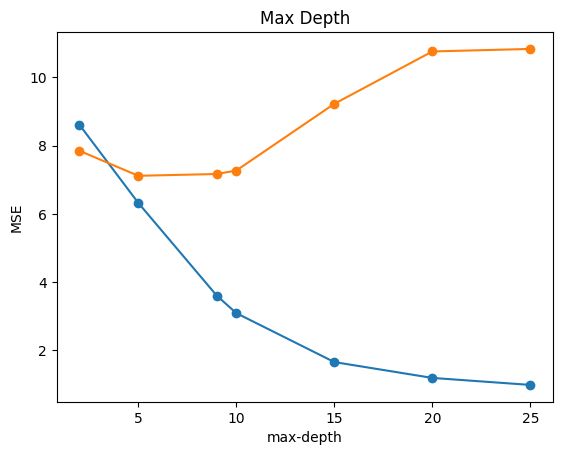

In [83]:
estim = [2,5,9,10,15,20,25]
train_result=[]
val_result=[]
for i in estim:
    print(i)
    xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=i, random_state=0)
    xgb.fit(x_train, y_train)
    y_train_pred = xgb.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = xgb.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))





plt.plot(estim,train_result, marker='o', linestyle='-')
plt.plot(estim,val_result, marker='o', linestyle='-')
plt.xlabel("max-depth")
plt.ylabel('MSE')
plt.title('Max Depth')
plt.show()


0.01
0.1
1
2
5


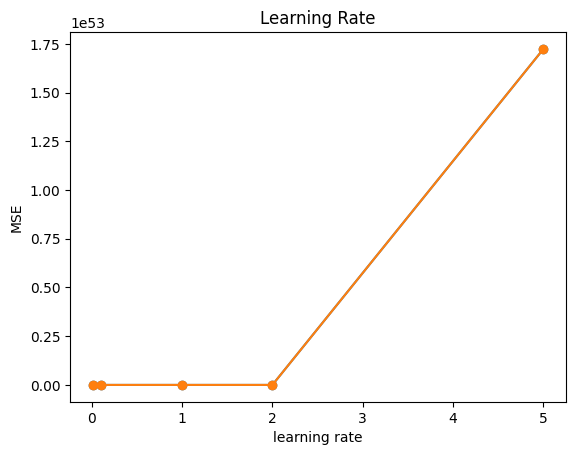

In [82]:
estim = [0.01,0.1,1,2,5]
train_result=[]
val_result=[]
for i in estim:
    print(i)
    xgb = XGBRegressor(n_estimators=50, learning_rate=i, max_depth= 3 , random_state=0)
    xgb.fit(x_train, y_train)
    y_train_pred = xgb.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = xgb.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))




plt.plot(estim,train_result, marker='o', linestyle='-')
plt.plot(estim,val_result, marker='o', linestyle='-')
plt.xlabel("learning rate")
plt.ylabel('MSE')
plt.title('Learning Rate')
plt.show()


In [84]:
list1=[]
depth = [5,7,8,9,10,15]
features= [5,10,15,25,50,60,75,100,125]
min_samples_s = [0.01,0.1,1]
for j in depth:
    for k in features:
        for l in min_samples_s:
            xgb = XGBRegressor(n_estimators=k, learning_rate= l , max_depth=j, random_state=32)
            xgb.fit(x_train, y_train)
            y_train_pred = xgb.predict(x_train)
            train_accuracy = mean_squared_error(y_train, y_train_pred)
            y_val_pred = xgb.predict(x_val)
            val_accuracy = mean_squared_error(y_val, y_val_pred)
            list1.append((j,k,l,train_accuracy,val_accuracy))
            print(f'''For max_depth:{j},n_estimators:{k},learning_rate:{l}
            train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')

For max_depth:5,n_estimators:5,learning_rate:0.01
            train accuracy:36.15103485361481 validation accuracy:32.40595076367675
For max_depth:5,n_estimators:5,learning_rate:0.1
            train accuracy:19.08711207312206 validation accuracy:16.653298966043064
For max_depth:5,n_estimators:5,learning_rate:1
            train accuracy:6.7528844586755765 validation accuracy:10.637303294432842
For max_depth:5,n_estimators:10,learning_rate:0.01
            train accuracy:33.51188379734885 validation accuracy:29.951519474768308
For max_depth:5,n_estimators:10,learning_rate:0.1
            train accuracy:11.808232135630869 validation accuracy:10.251799316210134
For max_depth:5,n_estimators:10,learning_rate:1
            train accuracy:6.12296730091129 validation accuracy:10.612837626682524
For max_depth:5,n_estimators:15,learning_rate:0.01
            train accuracy:31.125087565360914 validation accuracy:27.75289071754342
For max_depth:5,n_estimators:15,learning_rate:0.1
            trai

In [85]:
all_train_acc=[list1[i][3] for i in range(len(list1))]
all_val_acc=[list1[i][4] for i in range(len(list1))]
print(all_train_acc)
print(all_val_acc)

[36.15103485361481, 19.08711207312206, 6.7528844586755765, 33.51188379734885, 11.808232135630869, 6.12296730091129, 31.125087565360914, 9.047493361833174, 5.81366467706509, 27.00991267963088, 7.341527812118083, 5.1392859192451725, 19.614326405050956, 6.319994548698917, 4.45855607563335, 17.52399536106809, 6.181793723503085, 4.272197715258773, 15.058040578042396, 5.9362929386697365, 4.042309146235322, 12.217414619367837, 5.709591701862106, 3.7807760467020124, 10.423156882160708, 5.483335321597568, 3.5261281255592496, 36.04160364698999, 18.292551198688123, 5.672889895078722, 33.3024799493666, 10.716862190683532, 4.757636300101311, 30.821987746843636, 7.785822453678407, 4.340432563231448, 26.543587192743512, 5.937873419865919, 3.8114468991491206, 18.838144843876393, 4.854271418183686, 3.0839187628013263, 16.656153314928872, 4.696837516621953, 2.9143673100798018, 14.071792759112338, 4.439674321648379, 2.768367839152065, 11.115551244356642, 4.1694743627552375, 2.572161584805344, 9.239353186

In [86]:
import heapq
max_5_val_acc = heapq.nsmallest(10, all_val_acc)
max_5_val_acc

[6.8825533821929,
 6.949967079503761,
 7.01444878242439,
 7.023940190922021,
 7.06324660253249,
 7.114264055583997,
 7.166018629375619,
 7.185434074135138,
 7.1994764371945,
 7.222963998035073]

In [87]:
for i in range(len(max_5_val_acc)):
    print(list1[all_val_acc.index(max_5_val_acc[i])])

(9, 60, 0.1, 3.410309434730039, 6.8825533821929)
(9, 75, 0.1, 3.2221078572436976, 6.949967079503761)
(7, 25, 0.1, 5.937873419865919, 7.01444878242439)
(7, 50, 0.1, 4.854271418183686, 7.023940190922021)
(5, 25, 0.1, 7.341527812118083, 7.06324660253249)
(5, 50, 0.1, 6.319994548698917, 7.114264055583997)
(9, 50, 0.1, 3.603470408027309, 7.166018629375619)
(9, 25, 0.1, 4.709406541714363, 7.185434074135138)
(7, 60, 0.1, 4.696837516621953, 7.1994764371945)
(9, 100, 0.1, 2.9724953667732894, 7.222963998035073)


In [127]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=60, learning_rate=0.1, max_depth=9, random_state=0)
xgb.fit(x_train, y_train)
y_train_pred = xgb.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = xgb.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on test data: {mse1}")

Mean Squared Error (MSE) on training data: 3.410309434730039
Mean Squared Error (MSE) on test data: 6.8825533821929


In [128]:
y_test_pred = xgb.predict(test_data)

In [129]:
result_df = pd.DataFrame({
    'position': y_test_pred,
    'result_driver_standing': test_data["result_driver_standing"]
})
result_df.to_csv('submission_file_xgb.csv', index=False, header=['position', 'result_driver_standing'])

## Catboost Model

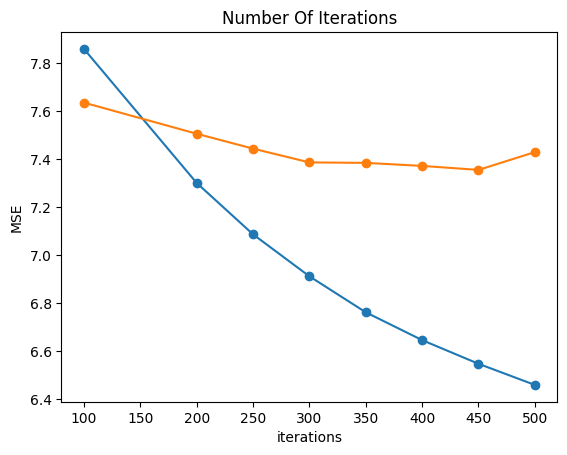

In [92]:
from catboost import CatBoostRegressor
estim = [100,200,250,300,350,400,450,500]
train_result=[]
val_result=[]
for i in estim:
    catboost = CatBoostRegressor(iterations= i, learning_rate=0.1, depth=3, random_state=0, silent=True)
    catboost.fit(x_train, y_train)
    y_train_pred = catboost.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = catboost.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))





plt.plot(estim,train_result, marker='o', linestyle='-')
plt.plot(estim,val_result, marker='o', linestyle='-')
plt.xlabel("iterations")
plt.ylabel('MSE')
plt.title('Number Of Iterations')
plt.show()


In [93]:
val_result

[7.634794630684779,
 7.505249844436526,
 7.443169174301169,
 7.385842990294807,
 7.383805518699819,
 7.371177759969147,
 7.354565321368992,
 7.428599897824319]

2
5
9
10
15


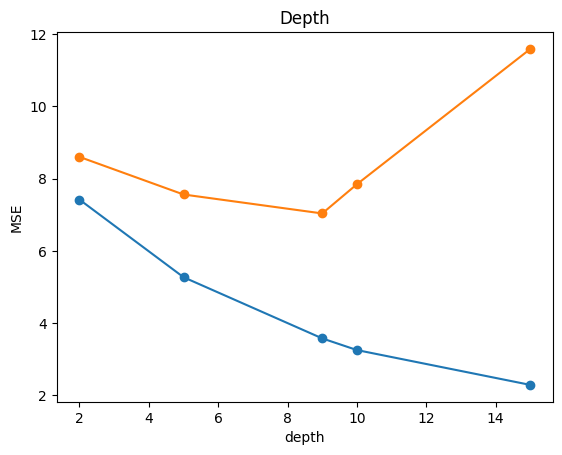

In [97]:
estim = [2,5,9,10,15]
train_result=[]
val_result=[]
for i in estim:
    print(i)
    catboost = CatBoostRegressor(iterations= 450, learning_rate=0.1, depth= i, random_state=0, silent=True)
    catboost.fit(x_train, y_train)
    y_train_pred = catboost.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = catboost.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))





plt.plot(estim,train_result, marker='o', linestyle='-')
plt.plot(estim,val_result, marker='o', linestyle='-')
plt.xlabel("depth")
plt.ylabel('MSE')
plt.title('Depth')
plt.show()


0.01
0.1
1
2


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


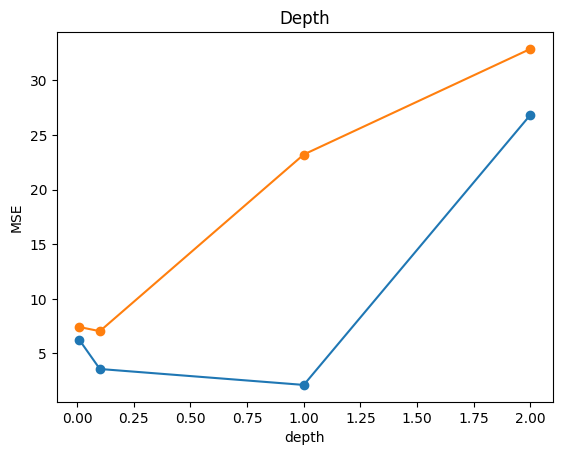

In [98]:
estim = [0.01,0.1,1,2]
train_result=[]
val_result=[]
for i in estim:
    print(i)
    catboost = CatBoostRegressor(iterations= 450, learning_rate= i, depth= 9, random_state=0, silent=True)
    catboost.fit(x_train, y_train)
    y_train_pred = catboost.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = catboost.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))





plt.plot(estim,train_result, marker='o', linestyle='-')
plt.plot(estim,val_result, marker='o', linestyle='-')
plt.xlabel("depth")
plt.ylabel('MSE')
plt.title('Depth')
plt.show()


In [99]:
list1=[]
depth = [5,7,9,10]
features= [400,425,450]
min_samples_s = [0.01,0.1]
for j in depth:
    for k in features:
        for l in min_samples_s:
            catboost = CatBoostRegressor(iterations=k, learning_rate= l , depth=j, random_state=32, silent=True)
            catboost.fit(x_train, y_train)
            y_train_pred = catboost.predict(x_train)
            train_accuracy = mean_squared_error(y_train, y_train_pred)
            y_val_pred = catboost.predict(x_val)
            val_accuracy = mean_squared_error(y_val, y_val_pred)
            list1.append((j,k,l,train_accuracy,val_accuracy))
            print(f'''For depth:{j},iterations:{k},learning_rate:{l}
            train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')

For depth:5,iterations:400,learning_rate:0.01
            train accuracy:7.908393303969475 validation accuracy:7.447204930735394
For depth:5,iterations:400,learning_rate:0.1
            train accuracy:5.4087958095041655 validation accuracy:7.271310469815163
For depth:5,iterations:425,learning_rate:0.01
            train accuracy:7.835820508264683 validation accuracy:7.40706059520954
For depth:5,iterations:425,learning_rate:0.1
            train accuracy:5.347731590942943 validation accuracy:7.335644829720593
For depth:5,iterations:450,learning_rate:0.01
            train accuracy:7.771857097557855 validation accuracy:7.36952828918554
For depth:5,iterations:450,learning_rate:0.1
            train accuracy:5.290308010379564 validation accuracy:7.3134326292825875
For depth:7,iterations:400,learning_rate:0.01
            train accuracy:7.130662046210351 validation accuracy:7.331975204264542
For depth:7,iterations:400,learning_rate:0.1
            train accuracy:4.4481459156611 validation a

In [100]:
all_train_acc=[list1[i][3] for i in range(len(list1))]
all_val_acc=[list1[i][4] for i in range(len(list1))]
print(all_train_acc)
print(all_val_acc)

[7.908393303969475, 5.4087958095041655, 7.835820508264683, 5.347731590942943, 7.771857097557855, 5.290308010379564, 7.130662046210351, 4.4481459156611, 7.05955254136426, 4.379376333286357, 6.992444077829767, 4.311796087238251, 6.367381672857858, 3.6958579202126867, 6.2876011750020515, 3.6311194535024622, 6.224892848041772, 3.5714049348735406, 5.983752214510711, 3.388694398680739, 5.90913236021751, 3.3221176518762343, 5.842233655236882, 3.2671295187861316]
[7.447204930735394, 7.271310469815163, 7.40706059520954, 7.335644829720593, 7.36952828918554, 7.3134326292825875, 7.331975204264542, 7.204658075392891, 7.2735075765936354, 7.266870142530666, 7.251898673859386, 7.271726567603457, 7.402796954993391, 6.973085911288308, 7.35224106983164, 6.974839102035771, 7.307977018198062, 6.941226250481769, 7.557780874434322, 7.3139517224348785, 7.5312801695338845, 7.309538964121992, 7.500466965341588, 7.3472407358592955]


In [101]:
import heapq
max_5_val_acc = heapq.nsmallest(10, all_val_acc)
max_5_val_acc

[6.941226250481769,
 6.973085911288308,
 6.974839102035771,
 7.204658075392891,
 7.251898673859386,
 7.266870142530666,
 7.271310469815163,
 7.271726567603457,
 7.2735075765936354,
 7.307977018198062]

In [102]:
for i in range(len(max_5_val_acc)):
    print(list1[all_val_acc.index(max_5_val_acc[i])])

(9, 450, 0.1, 3.5714049348735406, 6.941226250481769)
(9, 400, 0.1, 3.6958579202126867, 6.973085911288308)
(9, 425, 0.1, 3.6311194535024622, 6.974839102035771)
(7, 400, 0.1, 4.4481459156611, 7.204658075392891)
(7, 450, 0.01, 6.992444077829767, 7.251898673859386)
(7, 425, 0.1, 4.379376333286357, 7.266870142530666)
(5, 400, 0.1, 5.4087958095041655, 7.271310469815163)
(7, 450, 0.1, 4.311796087238251, 7.271726567603457)
(7, 425, 0.01, 7.05955254136426, 7.2735075765936354)
(9, 450, 0.01, 6.224892848041772, 7.307977018198062)


In [105]:
from catboost import CatBoostRegressor
catboost = CatBoostRegressor(iterations=450, learning_rate=0.1, depth=9, random_state=0, silent=True)
catboost.fit(x_train, y_train)
y_train_pred = catboost.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = catboost.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

Mean Squared Error (MSE) on training data: 3.573125921036362
Mean Squared Error (MSE) on training data: 7.035413198648431


In [106]:
y_test_pred = catboost.predict(test_data)

In [123]:
result_df = pd.DataFrame({
    'position': y_test_pred,
    'result_driver_standing': test_data["result_driver_standing"]
})
result_df.to_csv('submission_file_cat.csv', index=False, header=['position', 'result_driver_standing'])

In [126]:
df

,position,result_driver_standing
0,8.035360,298739826
1,7.336553,299218806
2,7.336553,299697786
3,6.516010,300176766
4,6.516010,300655746
...,...,...
352923,13.875174,1880337225
352924,13.875174,1881380625
352925,12.198771,1881902325
352926,11.496779,1882424025
